In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(rc={'figure.figsize':(11, 4)})
import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings('ignore')

pd.options.mode.use_inf_as_na = True
pd.options.mode.chained_assignment = None 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

## Data Load and Preprocessing

In [2]:
data = pd.read_csv('Eniram Data Engineer Assignment 2019.csv', index_col='Time',  
                   parse_dates=['Time'], infer_datetime_format=True)
data_origin = data.copy(deep=True)
print('Shape:',data.shape)
data.head(3)

Shape: (4392, 7)


,Stabilizers (boolean),Current (nm/h),Speed (nm/h),Power (MW),Wind speed (m/s),Sea temperature (Celsius),Ship name
Time,,,,,,,
2018-04-25 00:00:00,0.0,0.281,11.019,6.096,12.593,25.57,M/S Albatross
2018-04-25 01:00:00,0.0,0.263,11.137,6.058,14.559,25.60,M/S Albatross
2018-04-25 02:00:00,0.0,0.167,11.133,6.074,10.717,25.65,M/S Albatross


In [3]:
data.columns.values

array(['Stabilizers (boolean)', 'Current (nm/h)', 'Speed (nm/h)',
       'Power (MW)', 'Wind speed (m/s)', 'Sea temperature (Celsius)',
       'Ship name'], dtype=object)

In [4]:
features = data.drop(['Power (MW)','Ship name'],axis=1).columns.values.tolist()
cat_features = ['Stabilizers (boolean)'] 
num_features = [i for i in features if i not in cat_features]
target = 'Power (MW)'

In [5]:
## Check missing values
data.isna().sum()

Stabilizers (boolean)        1464
Current (nm/h)                  0
Speed (nm/h)                   16
Power (MW)                      5
Wind speed (m/s)                0
Sea temperature (Celsius)    1469
Ship name                       0
dtype: int64

in Task a, we have checked the missing values by vessels.

Albatross misses 15 'Speed' data points

Star misses 3 'Power', 5 'Sea temperature' data points

Aurora has no 'Stabilizers' and 'Sea temperature' data, and misses 1 'Speed', 2'Power' data points

In [6]:
# Stabilizers: null values are set as -1 (categorical variable) 
data['Stabilizers (boolean)'].fillna(-1,inplace=True)
data['Stabilizers (boolean)']=data['Stabilizers (boolean)'].astype('int')
data['Stabilizers (boolean)'] = data['Stabilizers (boolean)'].map({1:'On',0:'Off',-1:'Unknown'}) 

## Exploration

### Numerical variables

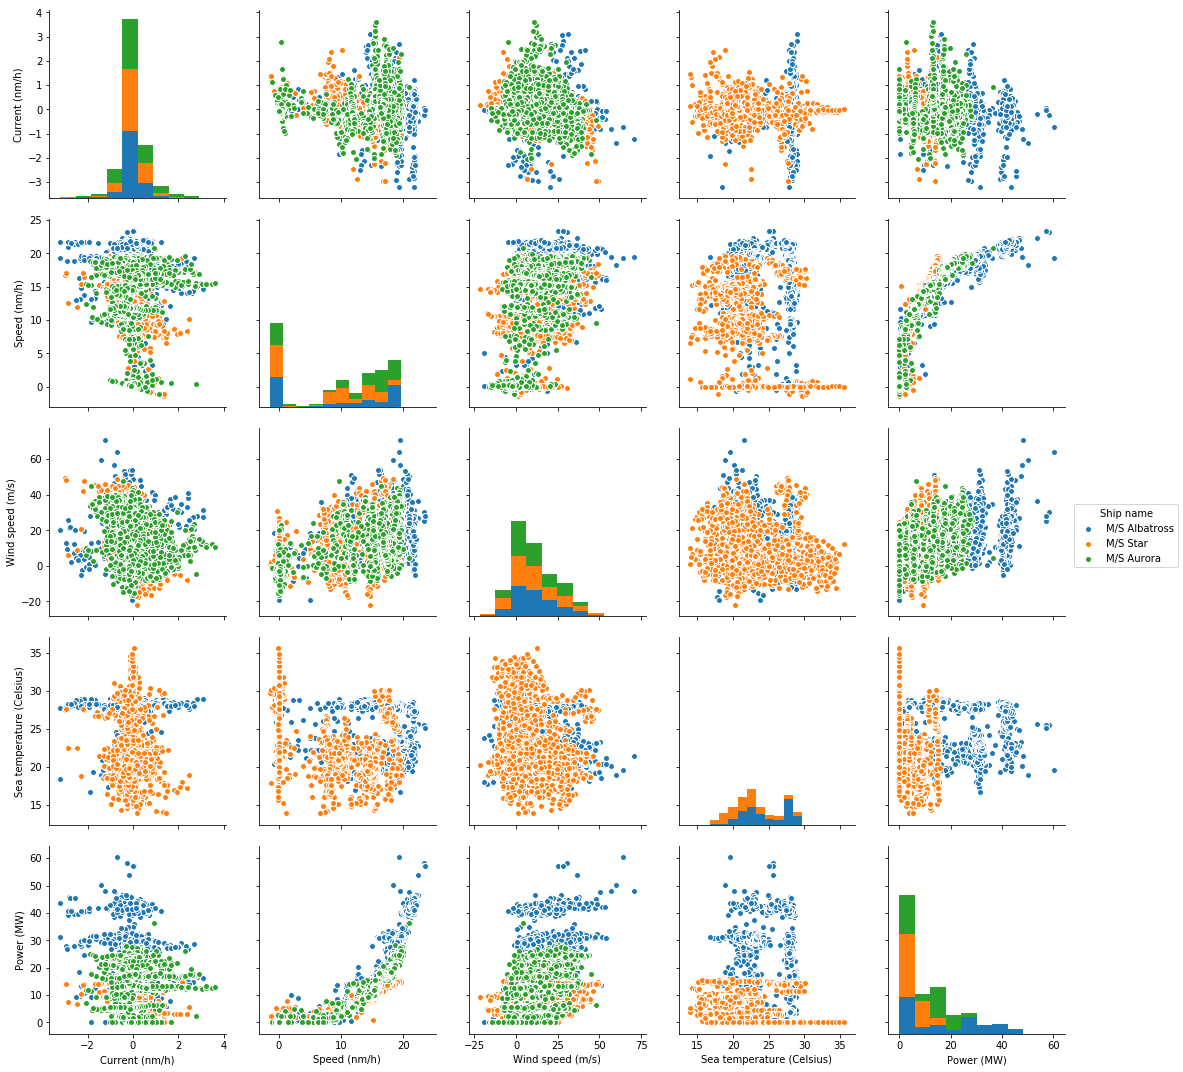

In [7]:
sns.pairplot(data,hue="Ship name",vars=num_features+[target],
             dropna=True,size=3)

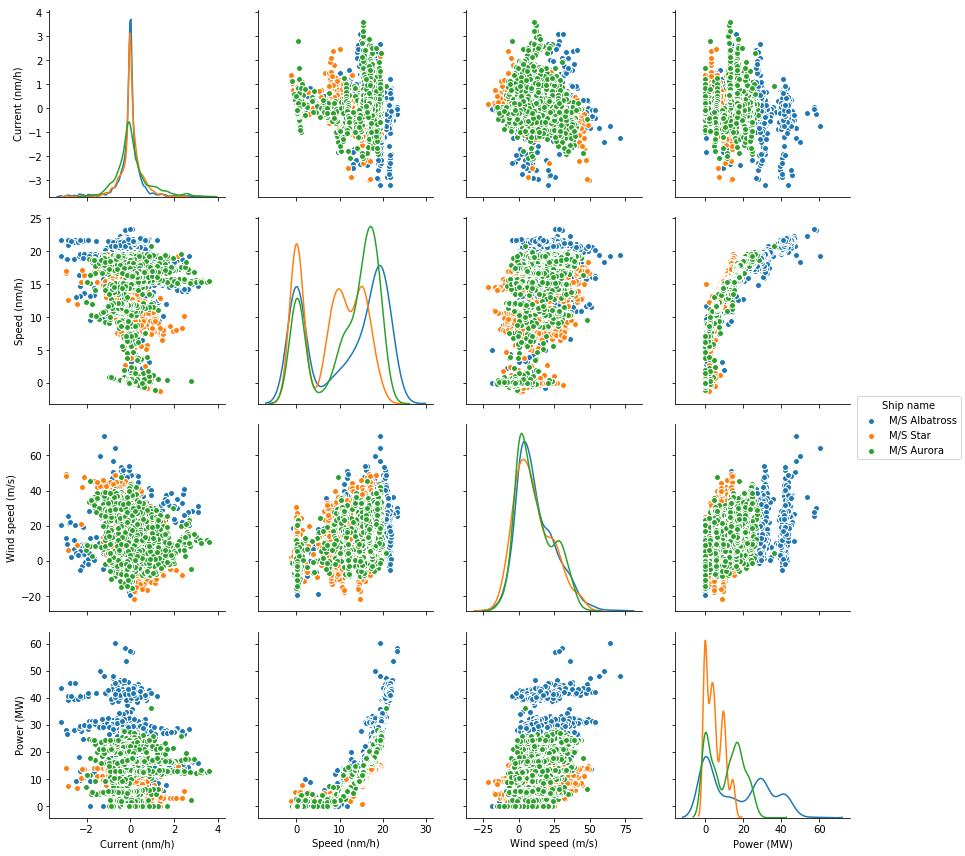

In [8]:
sns.pairplot(data,hue="Ship name",
             vars=['Current (nm/h)', 'Speed (nm/h)',
                   'Wind speed (m/s)']+[target],
             diag_kind = 'kde',dropna=True,size=3)

Text(0.5,1,'Correlations of Numerical Variables')

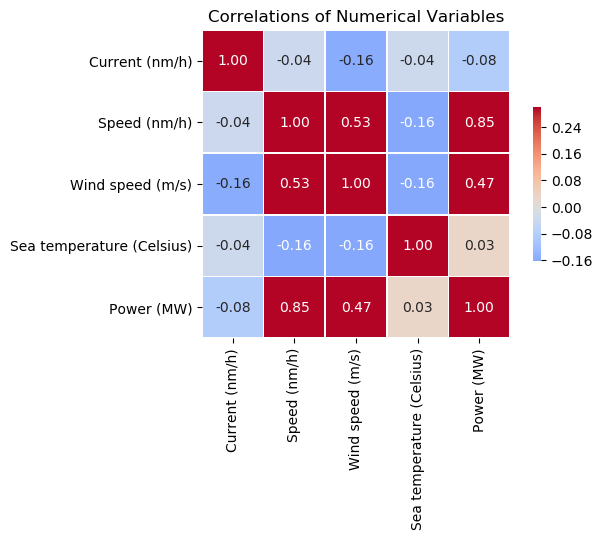

In [75]:
# correlation of numerical variables
corr = data[features+[target]].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr,  vmax=.3, center=0,
             square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
             annot=True, fmt='.2f', cmap='coolwarm')
 # sns.despine()
plt.title('Correlations of Numerical Variables')
plt.show()

Text(0.5,1,'Correlations')

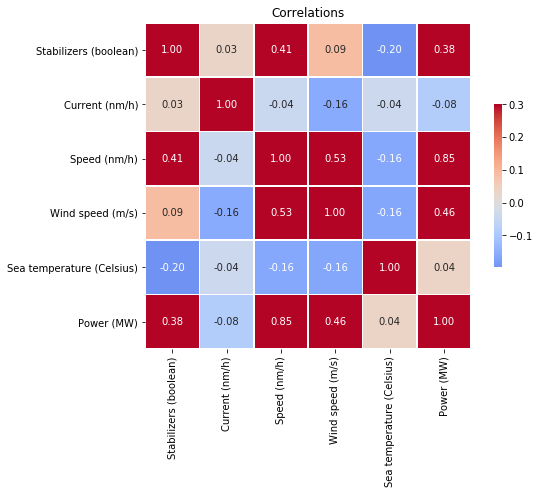

In [35]:
# Also see Stabilizers as numeric to compute corr now
corr = data_origin[features+[target]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,  vmax=.3, center=0,
             square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
             annot=True, fmt='.2f', cmap='coolwarm')
# sns.despine()
plt.title('Correlations')
plt.show()
plt.savefig('corr.png')

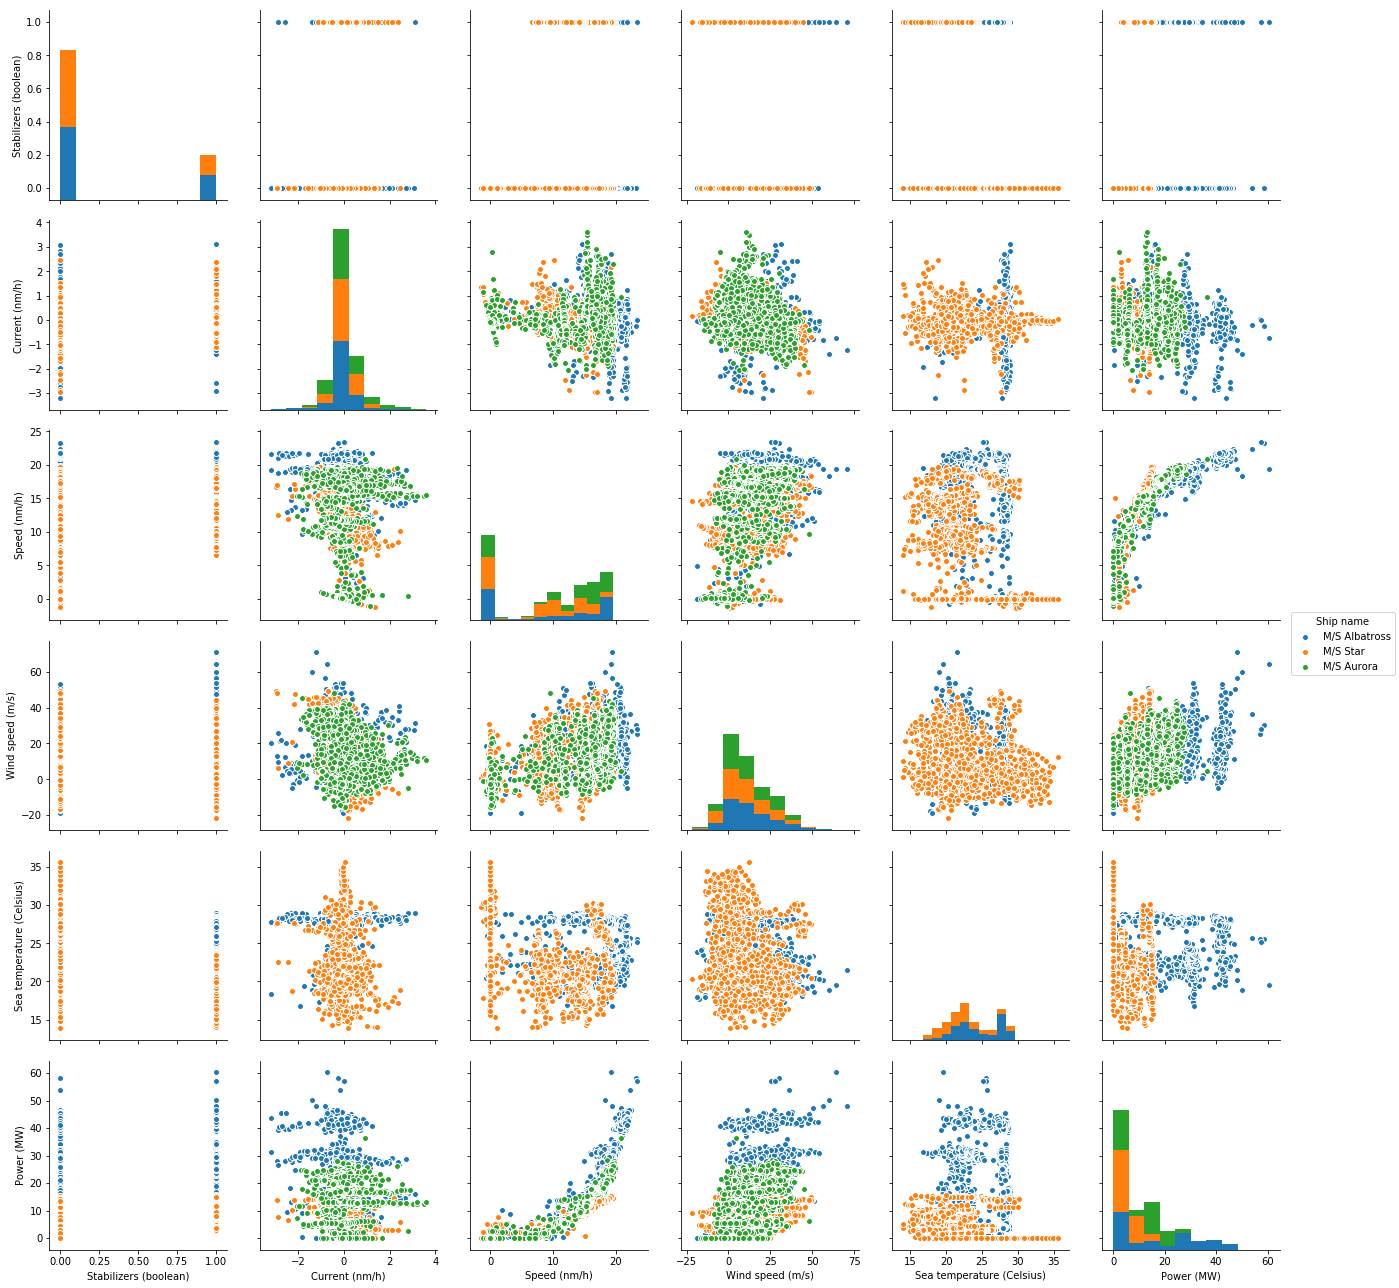

In [36]:
sns.pairplot(data_origin,hue="Ship name",
             vars=features+[target],
             dropna=True,size=3)
plt.savefig('pairplot.png')

strong positive correlation between speed and power

also positive correlation between wind speed and power

### Categorical variable

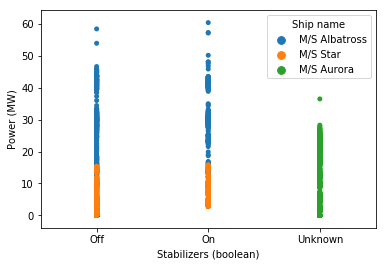

In [11]:
sns.stripplot(x=cat_features[0], y=target, data=data,hue='Ship name');

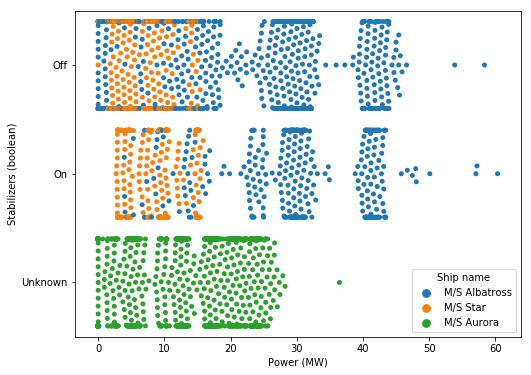

In [37]:
plot = sns.swarmplot(y = cat_features[0],
              x = target, 
              data = data,
              hue = 'Ship name',
              size = 5)
# sns.despine()
plot.figure.set_size_inches(8,6)
plt.show()
plt.savefig('stabilizers_swarm.png')

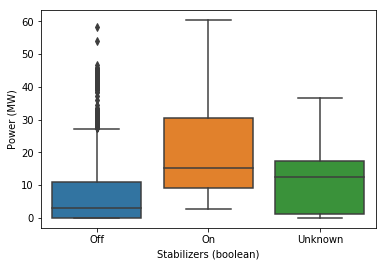

In [38]:
#box plot
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x=cat_features[0], y=target, data=data)
plt.savefig('stabilizers_box.png')

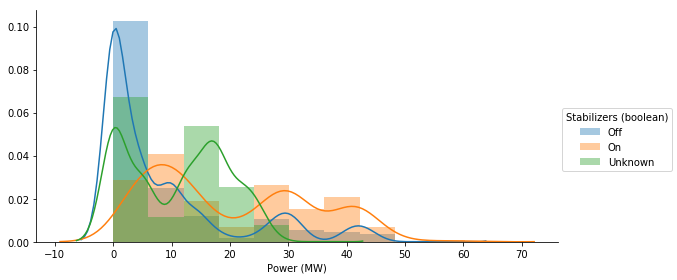

In [9]:
_, bins = np.histogram(data['Power (MW)'].dropna())
plot = sns.FacetGrid(data, hue="Stabilizers (boolean)",size=4, aspect=2)
plot = plot.map(sns.distplot, 'Power (MW)', bins=bins)
plot.add_legend()
plt.savefig('stabilizers_dist.png')

In [12]:
# def convert(data, to):
#     converted = None
#     if to == 'array':
#         if isinstance(data, np.ndarray):
#             converted = data
#         elif isinstance(data, pd.Series):
#             converted = data.values
#         elif isinstance(data, list):
#             converted = np.array(data)
#         elif isinstance(data, pd.DataFrame):
#             converted = data.as_matrix()
#     elif to == 'list':
#         if isinstance(data, list):
#             converted = data
#         elif isinstance(data, pd.Series):
#             converted = data.values.tolist()
#         elif isinstance(data, np.ndarray):
#             converted = data.tolist()
#     elif to == 'dataframe':
#         if isinstance(data, pd.DataFrame):
#             converted = data
#         elif isinstance(data, np.ndarray):
#             converted = pd.DataFrame(data)
#     else:
#         raise ValueError("Unknown data conversion: {}".format(to))
#     if converted is None:
#         raise TypeError('cannot handle data conversion of type: {} to {}'.format(type(data),to))
#     else:
#         return converted
    
# def conditional_entropy(x, y):
#     """
#     Calculates the conditional entropy of x given y: S(x|y)
#     Wikipedia: https://en.wikipedia.org/wiki/Conditional_entropy
#     :param x: list / NumPy ndarray / Pandas Series
#         A sequence of measurements
#     :param y: list / NumPy ndarray / Pandas Series
#         A sequence of measurements
#     :return: float
#     """
#     # entropy of x given y
#     y_counter = Counter(y)
#     xy_counter = Counter(list(zip(x,y)))
#     total_occurrences = sum(y_counter.values())
#     entropy = 0.0
#     for xy in xy_counter.keys():
#         p_xy = xy_counter[xy] / total_occurrences
#         p_y = y_counter[xy[1]] / total_occurrences
#         entropy += p_xy * math.log(p_y/p_xy)
#     return entropy

# def cramers_v(x, y):
#     confusion_matrix = pd.crosstab(x,y)
#     chi2 = ss.chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2/n
#     r,k = confusion_matrix.shape
#     phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
#     rcorr = r-((r-1)**2)/(n-1)
#     kcorr = k-((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# def theils_u(x, y):
#     s_xy = conditional_entropy(x,y)
#     x_counter = Counter(x)
#     total_occurrences = sum(x_counter.values())
#     p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
#     s_x = ss.entropy(p_x)
#     if s_x == 0:
#         return 1
#     else:
#         return (s_x - s_xy) / s_x

# def correlation_ratio(categories, measurements):
#     fcat, _ = pd.factorize(categories)
#     cat_num = np.max(fcat)+1
#     y_avg_array = np.zeros(cat_num)
#     n_array = np.zeros(cat_num)
#     for i in range(0,cat_num):
#         cat_measures = measurements[np.argwhere(fcat == i).flatten()]
#         n_array[i] = len(cat_measures)
#         y_avg_array[i] = np.average(cat_measures)
#     y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
#     numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
#     denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
#     if numerator == 0:
#         eta = 0.0
#     else:
#         eta = numerator/denominator
#     return eta

# def associations(dataset, nominal_columns=None, mark_columns=False, theil_u=False, plot=True,
#                           return_results = False, **kwargs):
#     """
#     Calculate the correlation/strength-of-association of features in data-set with both categorical (eda_tools) and
#     continuous features using:
#      - Pearson's R for continuous-continuous cases
#      - Correlation Ratio for categorical-continuous cases
#      - Cramer's V or Theil's U for categorical-categorical cases
#     :param dataset: NumPy ndarray / Pandas DataFrame
#         The data-set for which the features' correlation is computed
#     :param nominal_columns: string / list / NumPy ndarray
#         Names of columns of the data-set which hold categorical values. Can also be the string 'all' to state that all
#         columns are categorical, or None (default) to state none are categorical
#     :param mark_columns: Boolean (default: False)
#         if True, output's columns' names will have a suffix of '(nom)' or '(con)' based on there type (eda_tools or
#         continuous), as provided by nominal_columns
#     :param theil_u: Boolean (default: False)
#         In the case of categorical-categorical feaures, use Theil's U instead of Cramer's V
#     :param plot: Boolean (default: True)
#         If True, plot a heat-map of the correlation matrix
#     :param return_results: Boolean (default: False)
#         If True, the function will return a Pandas DataFrame of the computed associations
#     :param kwargs:
#         Arguments to be passed to used function and methods
#     :return: Pandas DataFrame
#         A DataFrame of the correlation/strength-of-association between all features
#     """

#     dataset = convert(dataset, 'dataframe')
#     columns = dataset.columns
#     if nominal_columns is None:
#         nominal_columns = list()
#     elif nominal_columns == 'all':
#         nominal_columns = columns
#     corr = pd.DataFrame(index=columns, columns=columns)
#     for i in range(0,len(columns)):
#         for j in range(i,len(columns)):
#             if i == j:
#                 corr[columns[i]][columns[j]] = 1.0
#             else:
#                 if columns[i] in nominal_columns:
#                     if columns[j] in nominal_columns:
#                         if theil_u:
#                             corr[columns[j]][columns[i]] = theils_u(dataset[columns[i]],dataset[columns[j]])
#                             corr[columns[i]][columns[j]] = theils_u(dataset[columns[j]],dataset[columns[i]])
#                         else:
#                             cell = cramers_v(dataset[columns[i]],dataset[columns[j]])
#                             corr[columns[i]][columns[j]] = cell
#                             corr[columns[j]][columns[i]] = cell
#                     else:
#                         cell = correlation_ratio(dataset[columns[i]], dataset[columns[j]])
#                         corr[columns[i]][columns[j]] = cell
#                         corr[columns[j]][columns[i]] = cell
#                 else:
#                     if columns[j] in nominal_columns:
#                         cell = correlation_ratio(dataset[columns[j]], dataset[columns[i]])
#                         corr[columns[i]][columns[j]] = cell
#                         corr[columns[j]][columns[i]] = cell
#                     else:
#                         cell, _ = ss.pearsonr(dataset[columns[i]], dataset[columns[j]])
#                         corr[columns[i]][columns[j]] = cell
#                         corr[columns[j]][columns[i]] = cell
#     corr.fillna(value=np.nan, inplace=True)
#     if mark_columns:
#         marked_columns = ['{} (nom)'.format(col) if col in nominal_columns else '{} (con)'.format(col) for col in columns]
#         corr.columns = marked_columns
#         corr.index = marked_columns
#     if plot:
#         plt.figure(figsize=(20,20))#kwargs.get('figsize',None))
#         sns.heatmap(corr, annot=kwargs.get('annot',True), fmt=kwargs.get('fmt','.2f'), cmap='coolwarm')
#         plt.show()
#     if return_results:
#         return corr


# results = associations(data,nominal_columns=cat_features,return_results=True)

## Machine learning

**Get relationship between features and target**

### Preprocessing for ML

In [10]:
data.isna().sum()

Stabilizers (boolean)           0
Current (nm/h)                  0
Speed (nm/h)                   16
Power (MW)                      5
Wind speed (m/s)                0
Sea temperature (Celsius)    1469
Ship name                       0
dtype: int64

In [11]:
# Convert categorical variable 
# data['Stabilizers (boolean)'] = data['Stabilizers (boolean)'].astype('category').cat.codes
encoded_columns = pd.get_dummies(data['Stabilizers (boolean)'])
data = data.join(encoded_columns).drop('Stabilizers (boolean)', axis=1)
data.head()

,Current (nm/h),Speed (nm/h),Power (MW),Wind speed (m/s),Sea temperature (Celsius),Ship name,Off,On,Unknown
Time,,,,,,,,,
2018-04-25,0.281,11.019,6.096,12.593,25.57,M/S Albatross,1,0,0
2018-04-25,0.281,11.019,6.096,12.593,25.57,M/S Albatross,0,1,0
2018-04-25,0.281,11.019,6.096,12.593,25.57,M/S Albatross,0,0,1
2018-04-25,0.284,9.916,4.662,24.663,23.90,M/S Star,1,0,0
2018-04-25,0.284,9.916,4.662,24.663,23.90,M/S Star,0,1,0


In [12]:
# Drop the null values of power (target)
data.dropna(subset=['Power (MW)'],inplace=True)

# Only 16 speed points missing, drop those rows.
data.dropna(subset=['Speed (nm/h)'],inplace=True)

data[data[['Sea temperature (Celsius)']].isnull().any(axis=1)]['Ship name'].unique()

array(['M/S Aurora', 'M/S Star'], dtype=object)

For the 'Sea temperature' data

Try: 
* v1: Drop 'Sea temp', not to consider its impact 
* v2: Drop 'Sea temp' null rows

( Since the Aurora misses all the 'Sea temp' data and thus personally I think it is meaningless to fill the null values with a certain method)

In [13]:
# v1: Drop 'Sea temp', not to consider its impact
data_v1 = data.drop(['Sea temperature (Celsius)'],axis=1)
print('shape of data_v1: ', data_v1.shape)
# v2:  Drop 'Sea temp' null rows
data_v2 = data.dropna(subset=['Sea temperature (Celsius)'])
print('shape of data_v2: ', data_v2.shape)

shape of data_v1:  (13113, 8)
shape of data_v2:  (8718, 9)


In [14]:
from sklearn.model_selection import train_test_split
def partition_data(df, features, target, test_size):
    
    X_train, X_test, y_train, y_test = train_test_split(df[features],df[target], 
                                                        stratify=df['Ship name'], 
                                                        test_size = test_size, random_state = 0)
    print("X_train : " + str(X_train.shape))
    print("X_test : " + str(X_test.shape))
    print("y_train : " + str(y_train.shape))
    print("y_test : " + str(y_test.shape))
    
    return X_train, X_test, y_train, y_test

In [15]:
v1_features = data_v1.drop(['Power (MW)','Ship name'],axis=1).columns.values.tolist()
v2_features = data_v2.drop(['Power (MW)','Ship name'],axis=1).columns.values.tolist()
print('v1')
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = partition_data(data_v1,v1_features,
                                                              target,0.2)
print('v2')
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = partition_data(data_v2,v2_features,
                                                              target,0.2)

v1
X_train : (10490, 6)
X_test : (2623, 6)
y_train : (10490,)
y_test : (2623,)
v2
X_train : (6974, 7)
X_test : (1744, 7)
y_train : (6974,)
y_test : (1744,)


In [16]:
# Define error measure RMSE
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv(model, X, y):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring = scorer, cv = 10))
    return rmse

In [18]:
def make_prediction(clf, clf_name, X_train, X_test, y_train, y_test,fig_name=None):
    
    clf.fit(X_train, y_train)

    # Look at cv results on training and validation set
    print("RMSE on Training set :", rmse_cv(clf, X_train, y_train).mean())
    print("RMSE on Test set :", rmse_cv(clf, X_test, y_test).mean())
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    plt.style.use('default')
    fig, axes = plt.subplots(1,2,figsize=(16,6))

    # Plot residuals
    axes[0].scatter(y_train_pred, y_train_pred - y_train, label = "Training data")
    axes[0].scatter(y_test_pred, y_test_pred - y_test, label = "Validation data")
    axes[0].set_title('Residuals')
    axes[0].set_xlabel("Predicted values")
    axes[0].set_ylabel("Residuals")
    axes[0].legend(loc = "upper left")
    axes[0].grid(True)
    # Plot predictions
    axes[1].scatter(y_train_pred, y_train, marker = "o", label = "Training data")
    axes[1].scatter(y_test_pred, y_test,  marker = "o", label = "Validation data")
    axes[1].set_title('Predictions')
    axes[1].set_xlabel("Predicted values")
    axes[1].set_ylabel("Real values")
    axes[1].legend(loc = "upper left")
    axes[1].grid(True)
    fig.suptitle(clf_name)
    
    if fig_name is not None:
        plt.savefig(fig_name)
        
    return axes

### Linear Regression

Coefficients can show the relationship between target and features

In [17]:
from sklearn.linear_model import LinearRegression
# Linear Regression
lr = LinearRegression()

### V1

RMSE on Training set : 6.128946265482556
RMSE on Test set : 5.901168473820844


array([<matplotlib.axes._subplots.AxesSubplot object at 0x2acd76ce0cc0>,
      dtype=object)

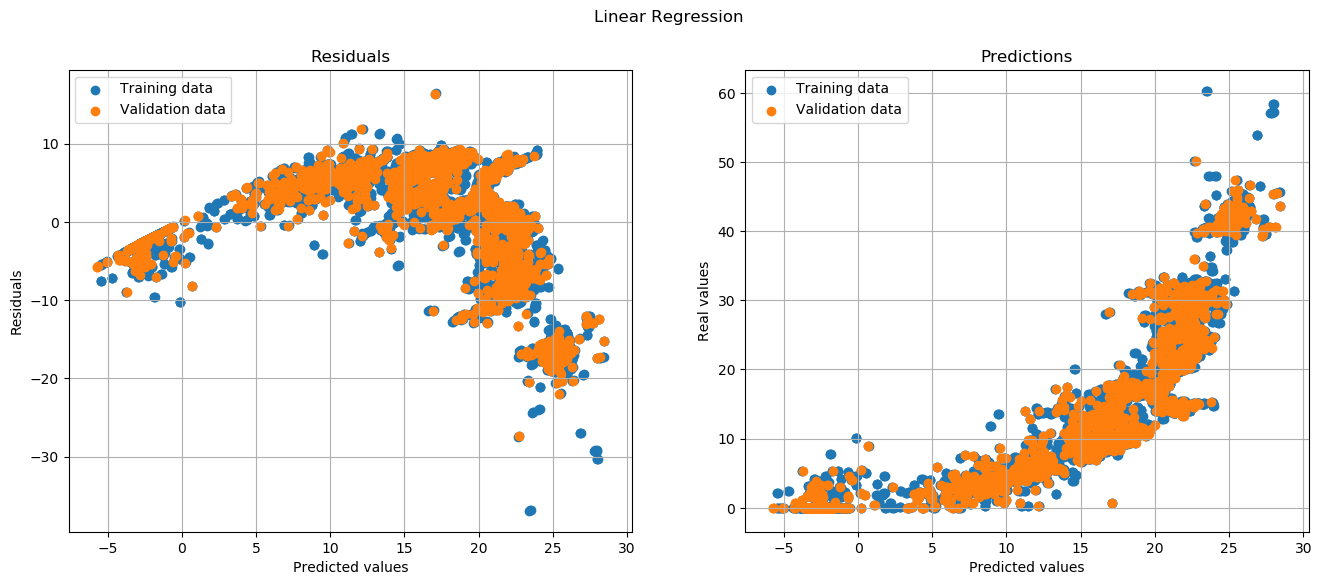

In [18]:
make_prediction(lr, 'Linear Regression', X_train_v1, X_test_v1, y_train_v1, y_test_v1,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Current (nm/h)     -0.861979
Speed (nm/h)        1.304218
Wind speed (m/s)    0.006367
Off                 0.014501
On                 -0.063058
Unknown             0.048557
dtype: float64


Text(0.5,1,'Coefficients in the Logistic regression')

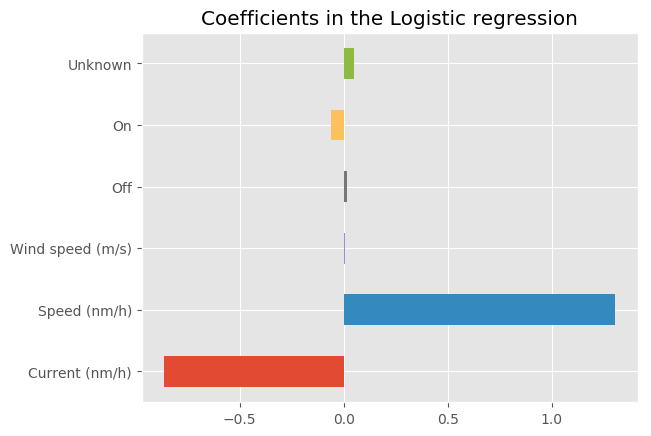

In [19]:
plt.style.use('ggplot')
lr.fit(X_train_v1, y_train_v1)
# Plot important coefficients
coefs = pd.Series(lr.coef_, index = X_train_v1.columns)
print(coefs)
# print("classifer picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
#       str(sum(coefs == 0)) + " features")
# imp_coefs = pd.concat([coefs.sort_values().head(10),
#                      coefs.sort_values().tail(10)])
imp_coefs = coefs
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Logistic regression")
plt.show()

### V2

RMSE on Training set : 6.489725682961165
RMSE on Test set : 6.299079214881447


array([<matplotlib.axes._subplots.AxesSubplot object at 0x2acd832f0710>,
      dtype=object)

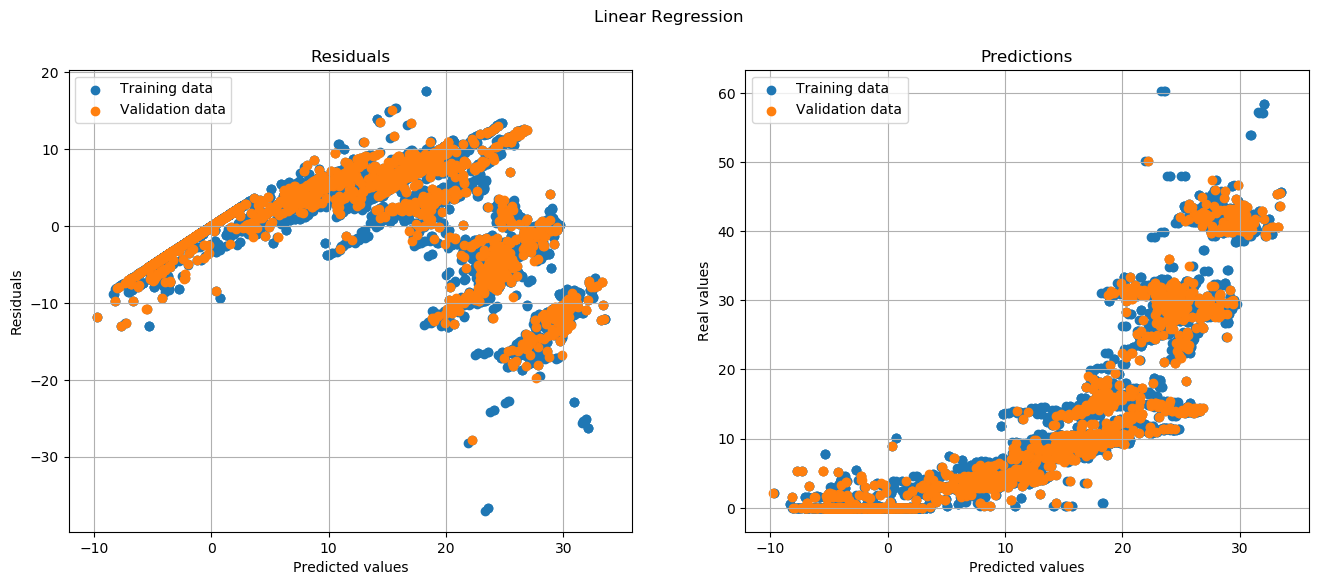

In [20]:
make_prediction(lr, 'Linear Regression', X_train_v2, X_test_v2, y_train_v2, y_test_v2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Current (nm/h)              -0.790764
Speed (nm/h)                 1.460923
Wind speed (m/s)             0.011089
Sea temperature (Celsius)    0.588863
Off                          0.110338
On                          -0.200025
Unknown                      0.089687
dtype: float64


Text(0.5,1,'Coefficients in the Logistic regression')

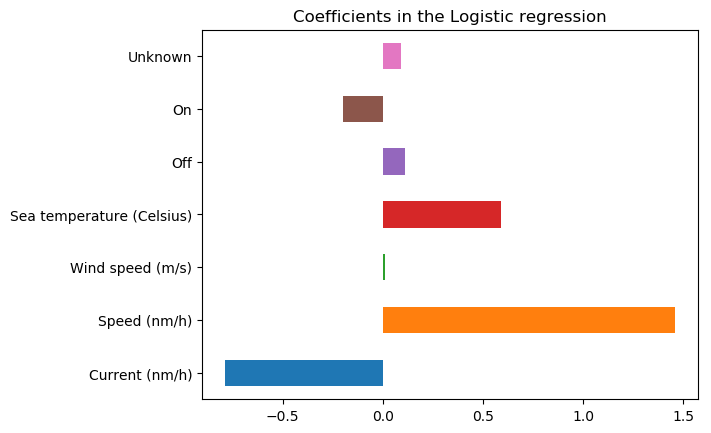

In [21]:
lr.fit(X_train_v2, y_train_v2)
# Plot important coefficients
coefs = pd.Series(lr.coef_, index = X_train_v2.columns)
print(coefs)
# print("classifer picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
#       str(sum(coefs == 0)) + " features")
# imp_coefs = pd.concat([coefs.sort_values().head(10),
#                      coefs.sort_values().tail(10)])
imp_coefs = coefs
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Logistic regression")
plt.show()

### Random forest

Feature importance

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1, n_estimators=10)

### V1

RMSE on Training set : 1.1604985945245656
RMSE on Test set : 2.1996897433422964


array([<matplotlib.axes._subplots.AxesSubplot object at 0x2b2473f22908>,
      dtype=object)

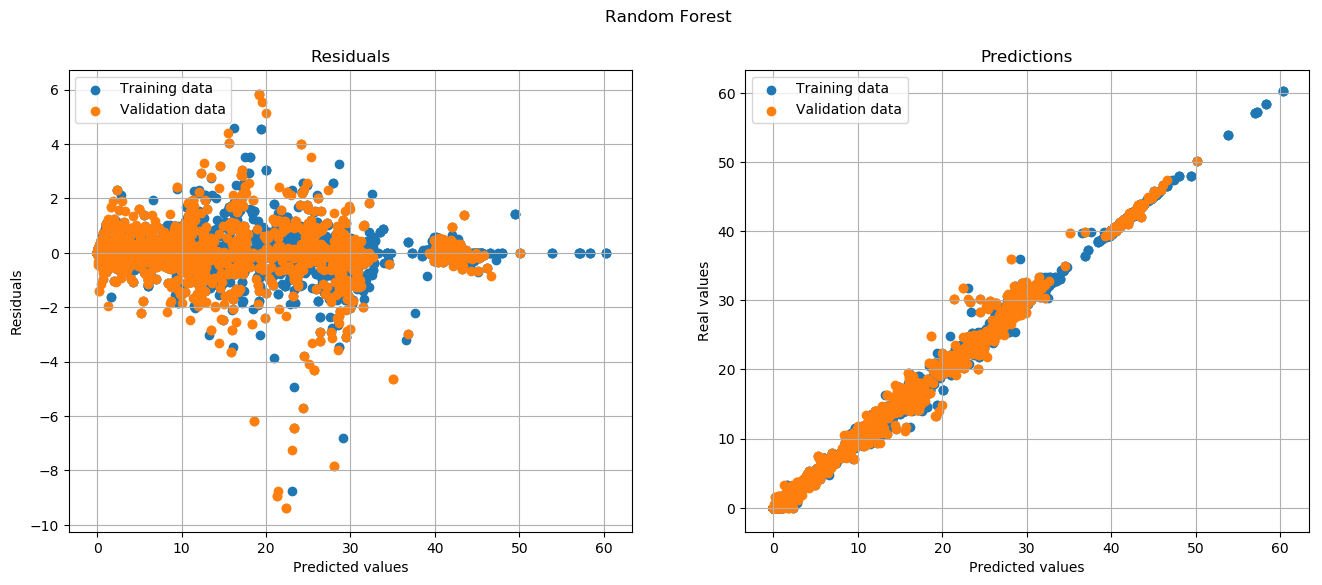

In [20]:
make_prediction(rf, 'Random Forest', X_train_v1, X_test_v1, y_train_v1, y_test_v1,'rf_pred.png')

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

Current (nm/h)      0.016102
Speed (nm/h)        0.956846
Wind speed (m/s)    0.026464
Off                 0.000162
On                  0.000338
Unknown             0.000088
dtype: float64


Text(0.5,1,'Coefficients in the Random Forest')

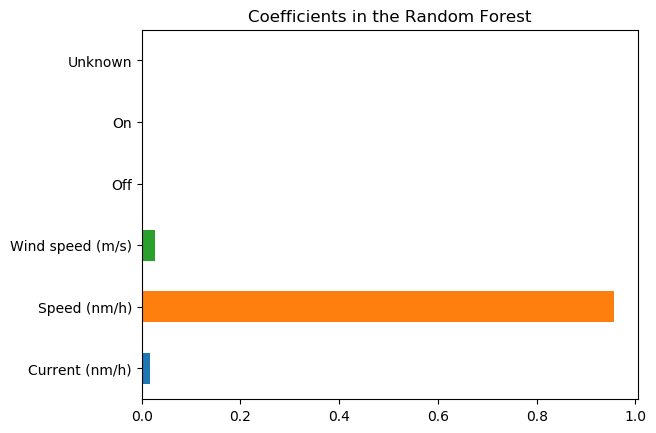

In [21]:
rf.fit(X_train_v1, y_train_v1)
# Plot important features
coefs = pd.Series(rf.feature_importances_, index = X_train_v1.columns)
print(coefs)
# print("classifer picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
#       str(sum(coefs == 0)) + " features")
# imp_coefs = pd.concat([coefs.sort_values().head(10),
#                      coefs.sort_values().tail(10)])
imp_coefs = coefs
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Random Forest")
plt.show()

### V2

RMSE on Training set : 0.9931879871787584
RMSE on Test set : 2.187059781569254


array([<matplotlib.axes._subplots.AxesSubplot object at 0x2b247e98da58>,
      dtype=object)

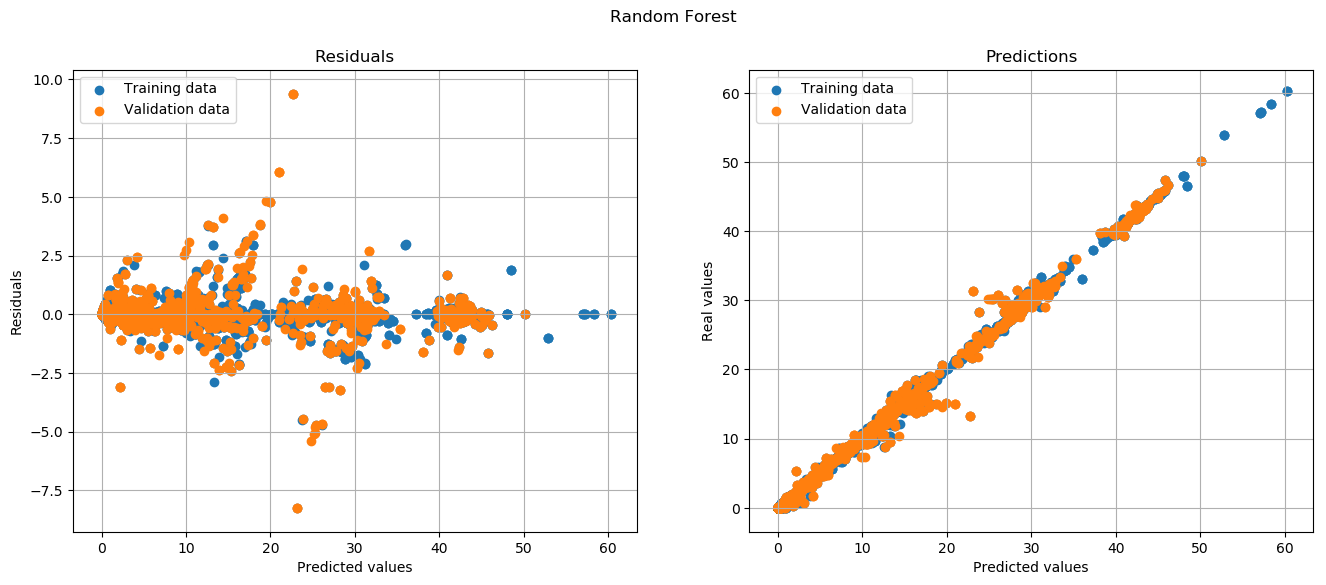

In [22]:
make_prediction(rf, 'Random Forest', X_train_v2, X_test_v2, y_train_v2, y_test_v2, 'rf_pred_v2.png')

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

Current (nm/h)               0.007964
Speed (nm/h)                 0.952983
Wind speed (m/s)             0.021972
Sea temperature (Celsius)    0.016859
Off                          0.000129
On                           0.000066
Unknown                      0.000027
dtype: float64


Text(0.5,1,'Coefficients in the Random Forest')

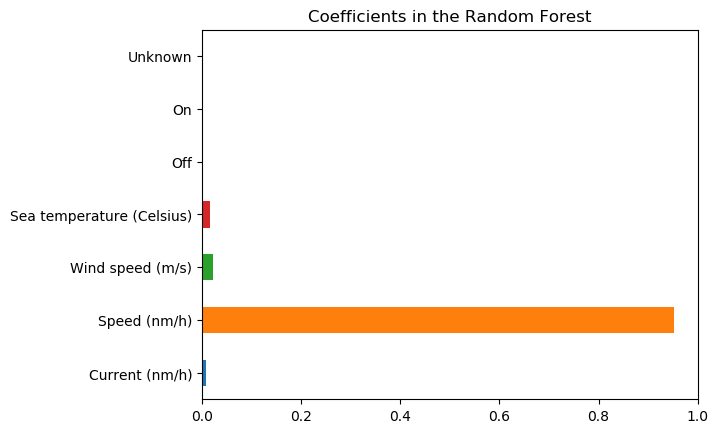

In [23]:
rf.fit(X_train_v2, y_train_v2)
# Plot important features
coefs = pd.Series(rf.feature_importances_, index = X_train_v2.columns)
print(coefs)
# print("classifer picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
#       str(sum(coefs == 0)) + " features")
# imp_coefs = pd.concat([coefs.sort_values().head(10),
#                      coefs.sort_values().tail(10)])
imp_coefs = coefs
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Random Forest")
plt.show()